In [37]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [38]:
data=pd.read_csv("IMDB Dataset.csv")
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [39]:
print(data["sentiment"].unique())

['positive' 'negative']


In [40]:
print(data["review"][0])
print()
print(data["sentiment"][0])
print()
print("The length of the text is ",len(data["review"][0]))

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [41]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag

In [42]:
from string import punctuation
data["review"]=data['review'].str.lower()

In [43]:
table = str.maketrans('', '', string.punctuation)
for i in range(len(data['review'])):
    data["review"][i] = data["review"][i].replace("<br />","").translate(table)

In [44]:
data["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

In [45]:
import inflect
p = inflect.engine()
for i in range(len(data['review'])):
    data["review"][i] =' '.join([str(p.number_to_words(((x)))) if x.isnumeric() else x for x in data["review"][i].split()])

In [46]:
stop_words = set(stopwords.words('english'))
print(stop_words)

{'not', 'before', 'am', 'did', 'own', "it's", 'most', 'off', 'there', 'we', 'been', 'having', 'hers', 'until', 'into', 'or', 'shouldn', 'up', 'mustn', 'your', 'was', 'our', 'll', "weren't", 'being', 'y', 'what', 'herself', 'how', 'down', 'further', 'himself', "shan't", 'it', "aren't", "you've", 'again', 'their', 'in', "you'd", 'other', 's', 'under', 'yourself', "don't", 'of', 'yourselves', 'where', "doesn't", 'same', "you're", "shouldn't", "didn't", 'ours', 'just', "she's", "couldn't", 'about', 'i', 'be', 'can', 'from', 'should', 'me', 'if', 'its', 'for', 'have', 'isn', "isn't", 'yours', 'mightn', 'only', "mightn't", "won't", 'whom', 'because', 'so', 't', 're', 'this', "hadn't", 'but', "hasn't", 'needn', 'on', 'him', 'more', 'any', 'theirs', 'doing', 'an', 'below', 'out', 'as', 'here', 'she', 'shan', 'while', 'a', "needn't", 'ourselves', 'they', 'some', 'itself', "should've", "wouldn't", 'between', 'you', 'which', 'those', 'doesn', 'don', 'his', 'do', 'now', "that'll", 'hadn', 'o', 'ma

In [47]:
review_lengths = Counter([len(x) for x in data["review"].values])
print("Zero-length reviews: {}".format(review_lengths[0]))
print("Maximum review length: {}".format(max(review_lengths)))
print('Number of reviews before removing outliers: ', len(data['review']))
zero_index = [i for i, review in enumerate(data.review) if len(review)==0]
print(zero_index,"index of review with 0 length")

Zero-length reviews: 0
Maximum review length: 13335
Number of reviews before removing outliers:  50000
[] index of review with 0 length


In [48]:
word_tokens = word_tokenize(data["review"][0])
filtered_review= [w for w in word_tokens if not w in stop_words]
print(filtered_review)

['one', 'reviewers', 'mentioned', 'watching', 'one', 'oz', 'episode', 'youll', 'hooked', 'right', 'exactly', 'happened', 'methe', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', 'set', 'right', 'word', 'go', 'trust', 'show', 'faint', 'hearted', 'timid', 'show', 'pulls', 'punches', 'regards', 'drugs', 'sex', 'violence', 'hardcore', 'classic', 'use', 'wordit', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', 'focuses', 'mainly', 'emerald', 'city', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', 'privacy', 'high', 'agenda', 'em', 'city', 'home', 'manyaryans', 'muslims', 'gangstas', 'latinos', 'christians', 'italians', 'irish', 'moreso', 'scuffles', 'death', 'stares', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'awayi', 'would', 'say', 'main', 'appeal', 'show', 'due', 'fact', 'goes', 'shows', 'wouldnt', 'dare', 'forget', 'pretty', 'pictures', 'painted', 'main

In [49]:
from nltk.probability import FreqDist
freqdist = FreqDist(filtered_review)
print('Sampling ', freqdist)
print('The first 3 frequently used tokens are')
freqdist.most_common(10)

Sampling  <FreqDist with 142 samples and 168 outcomes>
The first 3 frequently used tokens are


[('oz', 5),
 ('violence', 4),
 ('show', 3),
 ('prison', 3),
 ('forget', 3),
 ('one', 2),
 ('watching', 2),
 ('episode', 2),
 ('right', 2),
 ('first', 2)]

In [50]:
encoded = {"sentiment":{"positive": 1, "negative": 0}}

In [52]:
data.replace(encoded, inplace=True)

In [53]:
data["sentiment"].head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2000, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.review).toarray()
labels = data.sentiment
features.shape

(50000, 323)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [91]:
X_train, X_test, y_train, y_test = train_test_split(data["review"], data['sentiment'],test_size=0.3, random_state=42)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [92]:
y_pred=clf.predict(count_vect.transform(X_test))

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
# print("test accuracy")
o=accuracy_score(y_test, y_pred,normalize=True)
print("The accuracy of this model is",o)

0.8346


In [98]:
from sklearn.metrics import confusion_matrix

In [102]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[6896,  515],
       [1966, 5623]], dtype=int64)

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay

In [104]:
cmdisplay = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

In [105]:
import matplotlib.pyplot as plt

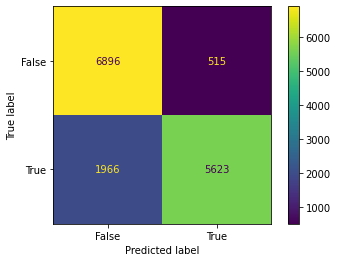

In [106]:
cmdisplay.plot()
plt.show()